In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Create synthetic relationships data
relationships_data = {
    'character_a': ['Phoenix Wright', 'Phoenix Wright', 'Phoenix Wright', 'Maya Fey', 'Miles Edgeworth', 
                   'Miles Edgeworth', 'Maya Fey', 'Mia Fey', 'Godot', 'Franziska von Karma'],
    'character_b': ['Maya Fey', 'Miles Edgeworth', 'Mia Fey', 'Pearl Fey', 'Franziska von Karma', 
                   'Phoenix Wright', 'Mia Fey', 'Maya Fey', 'Mia Fey', 'Miles Edgeworth'],
    'relationship_type': ['PARTNERS', 'RIVALS', 'MENTOR', 'FAMILY', 'RIVALS', 
                         'FRIENDS', 'FAMILY', 'FAMILY', 'OBSESSION', 'RIVALS'],
    'strength': [9, 8, 7, 10, 6, 7, 9, 10, 8, 5],
    'direction': ['BIDIRECTIONAL', 'BIDIRECTIONAL', 'A_TO_B', 'BIDIRECTIONAL', 'BIDIRECTIONAL',
                 'BIDIRECTIONAL', 'BIDIRECTIONAL', 'BIDIRECTIONAL', 'A_TO_B', 'BIDIRECTIONAL']
}

df_relationships = pd.DataFrame(relationships_data)
print("Synthetic Relationships Table:")
print(df_relationships)

Synthetic Relationships Table:
           character_a          character_b relationship_type  strength  \
0       Phoenix Wright             Maya Fey          PARTNERS         9   
1       Phoenix Wright      Miles Edgeworth            RIVALS         8   
2       Phoenix Wright              Mia Fey            MENTOR         7   
3             Maya Fey            Pearl Fey            FAMILY        10   
4      Miles Edgeworth  Franziska von Karma            RIVALS         6   
5      Miles Edgeworth       Phoenix Wright           FRIENDS         7   
6             Maya Fey              Mia Fey            FAMILY         9   
7              Mia Fey             Maya Fey            FAMILY        10   
8                Godot              Mia Fey         OBSESSION         8   
9  Franziska von Karma      Miles Edgeworth            RIVALS         5   

       direction  
0  BIDIRECTIONAL  
1  BIDIRECTIONAL  
2         A_TO_B  
3  BIDIRECTIONAL  
4  BIDIRECTIONAL  
5  BIDIRECTIONAL  
6  BIDIREC

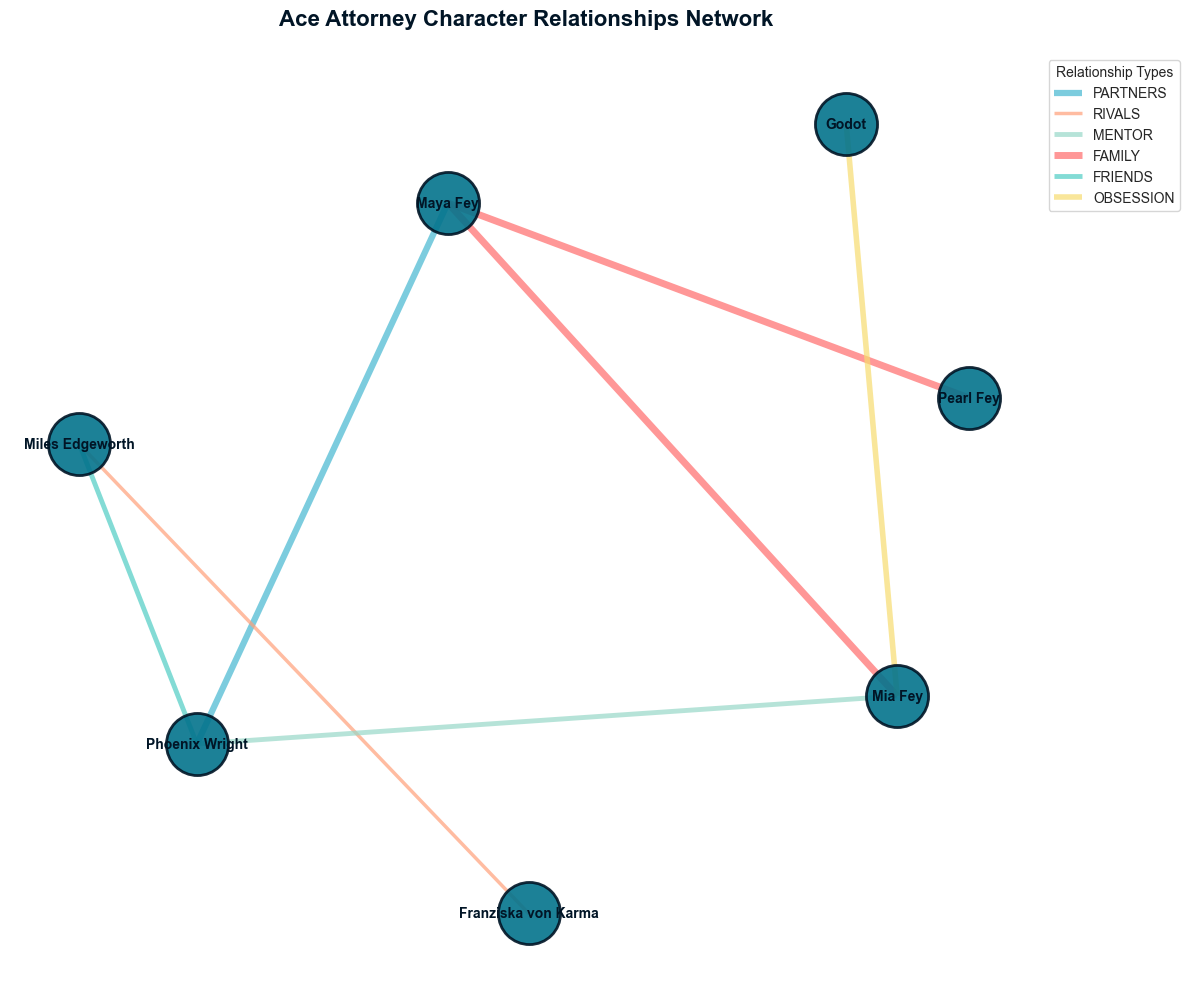

In [3]:
# Create graph
G = nx.Graph()

# Add nodes and edges
for _, row in df_relationships.iterrows():
    G.add_node(row['character_a'])
    G.add_node(row['character_b'])
    
    # Edge attributes
    edge_attributes = {
        'relationship': row['relationship_type'],
        'strength': row['strength'],
        'direction': row['direction']
    }
    G.add_edge(row['character_a'], row['character_b'], **edge_attributes)

# Create the visualization
plt.figure(figsize=(12, 10))

# Node positions using spring layout
pos = nx.spring_layout(G, k=3, iterations=50)

COLORS = {
    'bg': '#F2E6D0',
    'fg': '#011526',
    'fg_faded': '#97A69B',
    'accent0': '#03738C',
    'accent1': '#D97904',
    'accent2': '#E6D0c0'
}

# Define colors for relationship types
relationship_colors = {
    'FAMILY': '#FF6B6B',
    'FRIENDS': '#4ECDC4', 
    'PARTNERS': '#45B7D1',
    'RIVALS': '#FFA07A',
    'MENTOR': '#98D8C8',
    'OBSESSION': '#F7DC6F'
}

# Draw edges with different colors and widths
for relationship_type in df_relationships['relationship_type'].unique():
    edges = [(u, v) for u, v, d in G.edges(data=True) if d['relationship'] == relationship_type]
    widths = [G[u][v]['strength'] * 0.5 for u, v in edges]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=widths, 
                          edge_color=relationship_colors[relationship_type], 
                          alpha=0.7, label=relationship_type)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=COLORS['accent0'], 
                      alpha=0.9, edgecolors=COLORS['fg'], linewidths=2)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', 
                       font_color=COLORS['fg'])

# Customize the plot
plt.title('Ace Attorney Character Relationships Network', 
          color=COLORS['fg'], fontsize=16, fontweight='bold', pad=20)
plt.legend(title='Relationship Types', loc='upper left', bbox_to_anchor=(1, 1))
plt.axis('off')

plt.tight_layout()
plt.savefig('character_relationships_network.svg', format='svg', 
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()